In [1]:

#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 432x216 with 0 Axes>

In [2]:
data_train=pd.read_csv("Train_data.csv")

In [3]:
#Data Understanding 

#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
data_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [6]:
data_train['class'].unique()

array(['normal', 'anomaly'], dtype=object)

### Vars to Remove

In [7]:
to_delete_1=["num_outbound_cmds",
"dst_host_rerror_rate",
"rerror_rate",     
"srv_rerror_rate",
"dst_host_serror_rate",
"serror_rate",     
"srv_serror_rate", 
"num_compromised",
"service"]

In [8]:
data_train.drop(to_delete_1, inplace=True, axis=1)

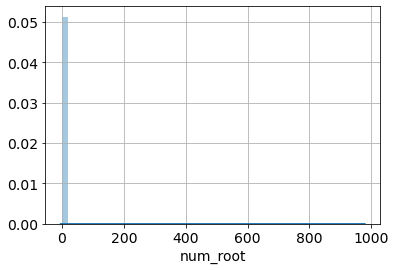

In [9]:
sns.distplot(data_train.num_root)

In [10]:
data_train.shape

(25192, 33)

In [11]:
data_train.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'class'], dtype='object')

In [12]:
data_train.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal
1,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal
2,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,anomaly
3,0,tcp,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.01,0.01,normal
4,0,tcp,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


In [13]:
data_train.hot.unique()

array([ 0,  5,  6,  4,  2,  1, 28, 30, 22, 24, 14,  3, 15, 25, 19, 18, 77,
       17, 11,  7, 20, 12], dtype=int64)

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   flag                         25192 non-null  object 
 3   src_bytes                    25192 non-null  int64  
 4   dst_bytes                    25192 non-null  int64  
 5   land                         25192 non-null  int64  
 6   wrong_fragment               25192 non-null  int64  
 7   urgent                       25192 non-null  int64  
 8   hot                          25192 non-null  int64  
 9   num_failed_logins            25192 non-null  int64  
 10  logged_in                    25192 non-null  int64  
 11  root_shell                   25192 non-null  int64  
 12  su_attempted                 25192 non-null  int64  
 13  num_root        

In [15]:
to_delete_skewed=["dst_bytes",
"num_access_files",
"num_failed_logins", 
"num_file_creations",
"num_root",
"src_bytes"]

In [16]:
data_train.drop(to_delete_skewed, inplace=True, axis=1)

In [17]:
data_train.shape

(25192, 27)

In [18]:
to_obj=["is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment"]

In [19]:
data_train[to_obj]=data_train[to_obj].astype(object)

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   flag                         25192 non-null  object 
 3   land                         25192 non-null  object 
 4   wrong_fragment               25192 non-null  object 
 5   urgent                       25192 non-null  object 
 6   hot                          25192 non-null  int64  
 7   logged_in                    25192 non-null  object 
 8   root_shell                   25192 non-null  object 
 9   su_attempted                 25192 non-null  object 
 10  num_shells                   25192 non-null  object 
 11  is_host_login                25192 non-null  object 
 12  is_guest_login               25192 non-null  object 
 13  count           

In [21]:
to_float=["duration","hot","count","srv_count","dst_host_count","dst_host_srv_count"]

In [22]:
data_train[to_float]=data_train[to_float].astype(float)

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   protocol_type                25192 non-null  object 
 2   flag                         25192 non-null  object 
 3   land                         25192 non-null  object 
 4   wrong_fragment               25192 non-null  object 
 5   urgent                       25192 non-null  object 
 6   hot                          25192 non-null  float64
 7   logged_in                    25192 non-null  object 
 8   root_shell                   25192 non-null  object 
 9   su_attempted                 25192 non-null  object 
 10  num_shells                   25192 non-null  object 
 11  is_host_login                25192 non-null  object 
 12  is_guest_login               25192 non-null  object 
 13  count           

In [24]:
cat_var_binary=[
"is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment",
"protocol_type"]

In [25]:
data_cat_binary=data_train[cat_var_binary]
data_num_binary=data_train[data_train.columns.difference(cat_var_binary)]

In [26]:
data_num_binary.shape

(25192, 16)

In [27]:
data_cat_binary.shape

(25192, 11)

In [28]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [29]:
data_cat_binary=pd.get_dummies(data_cat_binary, drop_first=True)

In [30]:
data_binary=pd.concat([data_num_binary,data_cat_binary],axis=1)

In [31]:
data_binary

,class,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,is_guest_login_1,land_1,logged_in_1,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,num_shells_1,root_shell_1,su_attempted_1,su_attempted_2,urgent_1,wrong_fragment_1,wrong_fragment_3,protocol_type_tcp,protocol_type_udp
0,normal,2.0,0.00,150.0,0.03,0.17,0.17,25.0,0.00,0.00,0.00,0.0,0.0,1.00,2.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,normal,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.08,1.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,anomaly,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,0.0,0.05,6.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,normal,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,0.0,1.00,5.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,normal,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,0.0,1.00,32.0,0.09,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,anomaly,100.0,0.07,255.0,0.06,0.00,0.03,7.0,0.00,1.00,0.00,0.0,0.0,0.07,7.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25188,anomaly,1.0,0.00,1.0,0.00,1.00,1.00,39.0,0.18,0.00,0.00,0.0,0.0,1.00,1.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
25189,anomaly,105.0,0.07,255.0,0.07,0.00,0.05,13.0,0.00,1.00,0.00,0.0,0.0,0.07,7.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25190,anomaly,129.0,0.06,255.0,0.06,0.00,0.08,20.0,0.00,0.00,1.00,0.0,0.0,0.14,18.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
data_binary['class'] = data_binary['class'].apply(lambda x:0 if x=='normal' else 1)

In [33]:
data_binary

,class,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,is_guest_login_1,land_1,logged_in_1,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,num_shells_1,root_shell_1,su_attempted_1,su_attempted_2,urgent_1,wrong_fragment_1,wrong_fragment_3,protocol_type_tcp,protocol_type_udp
0,0,2.0,0.00,150.0,0.03,0.17,0.17,25.0,0.00,0.00,0.00,0.0,0.0,1.00,2.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,13.0,0.15,255.0,0.60,0.88,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.08,1.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,123.0,0.07,255.0,0.05,0.00,0.10,26.0,0.00,0.00,1.00,0.0,0.0,0.05,6.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,5.0,0.00,30.0,0.00,0.03,1.00,255.0,0.04,0.01,0.01,0.0,0.0,1.00,5.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,30.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.00,0.00,0.0,0.0,1.00,32.0,0.09,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,1,100.0,0.07,255.0,0.06,0.00,0.03,7.0,0.00,1.00,0.00,0.0,0.0,0.07,7.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25188,1,1.0,0.00,1.0,0.00,1.00,1.00,39.0,0.18,0.00,0.00,0.0,0.0,1.00,1.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
25189,1,105.0,0.07,255.0,0.07,0.00,0.05,13.0,0.00,1.00,0.00,0.0,0.0,0.07,7.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25190,1,129.0,0.06,255.0,0.06,0.00,0.08,20.0,0.00,0.00,1.00,0.0,0.0,0.14,18.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


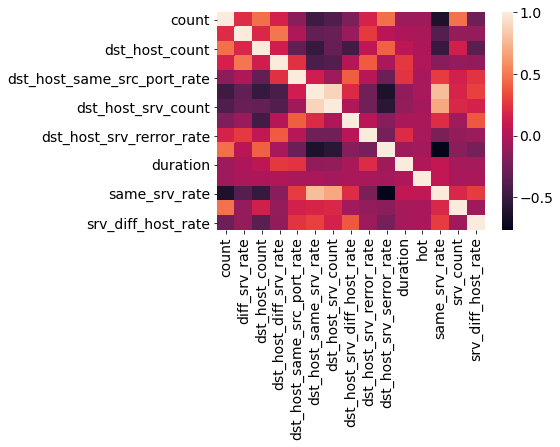

In [34]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num_binary.corr())

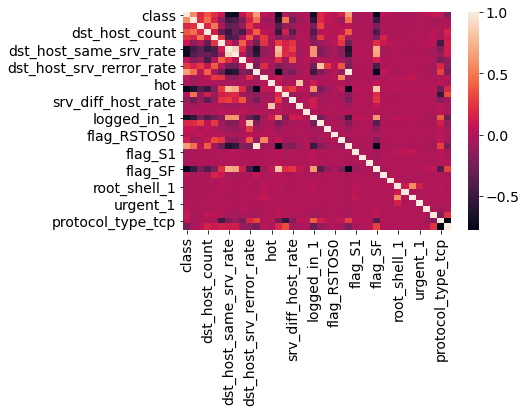

In [36]:

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_binary.corr())

In [37]:
corr_binary = data_binary.corr()
corr_binary.to_csv('corr_binary.csv')

### Variable Reduction or Feature Selection
Univariate Regression
WOE - Binomial classification
RFE
SelectKBest
VIF
PCA

### Univariate Regression

In [38]:
somersd_df = pd.DataFrame()
for num_variable in data_binary.columns.difference(['class']):
    result = smf.logit(formula = str('class ~ ')+str(num_variable), data=data_binary).fit()
    somers_d = 2*metrics.roc_auc_score(data_binary.Attack_type_1, result.predict()) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['VariableName', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

SyntaxError: invalid syntax (<unknown>, line 1)

### RFE

In [39]:
X = data_binary[data_binary.columns.difference(['class'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X, data_binary[['class']])

In [40]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [41]:
imp_vars_RFE

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'flag_S0',
 'flag_SF',
 'hot',
 'logged_in_1',
 'protocol_type_tcp',
 'protocol_type_udp',
 'same_srv_rate',
 'srv_count',
 'srv_diff_host_rate']

### Select KBest

In [42]:
X = data_binary[data_binary.columns.difference(['class'])]
SKB = SelectKBest(f_classif, k=20).fit(X, data_binary[['class']])

In [43]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [44]:
imp_vars_SKB

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'logged_in_1',
 'protocol_type_udp',
 'same_srv_rate',
 'srv_diff_host_rate',
 'wrong_fragment_3']

### Final List (from Univariate, RFE, SelectKbest)

In [46]:
Final_list = list(set(imp_vars_SKB + imp_vars_RFE))

In [47]:
Final_list

['dst_host_diff_srv_rate',
 'dst_host_srv_count',
 'wrong_fragment_3',
 'duration',
 'count',
 'dst_host_count',
 'dst_host_srv_serror_rate',
 'diff_srv_rate',
 'hot',
 'flag_RSTO',
 'flag_SF',
 'same_srv_rate',
 'dst_host_srv_rerror_rate',
 'flag_S0',
 'dst_host_srv_diff_host_rate',
 'srv_diff_host_rate',
 'srv_count',
 'logged_in_1',
 'protocol_type_tcp',
 'dst_host_same_src_port_rate',
 'flag_RSTR',
 'protocol_type_udp',
 'dst_host_same_srv_rate',
 'flag_REJ']

In [48]:
X = data_binary[Final_list]

In [49]:
X.columns

Index(['dst_host_diff_srv_rate', 'dst_host_srv_count', 'wrong_fragment_3', 'duration', 'count', 'dst_host_count', 'dst_host_srv_serror_rate', 'diff_srv_rate', 'hot', 'flag_RSTO', 'flag_SF', 'same_srv_rate', 'dst_host_srv_rerror_rate', 'flag_S0', 'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'srv_count', 'logged_in_1', 'protocol_type_tcp', 'dst_host_same_src_port_rate', 'flag_RSTR', 'protocol_type_udp', 'dst_host_same_srv_rate', 'flag_REJ'], dtype='object')

### Using WOE (Weight of Evidence)
1. Identify important variables using WOE or log(odds) comparing with Y
2. Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

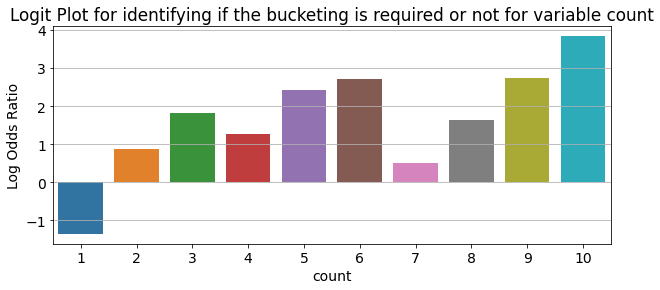

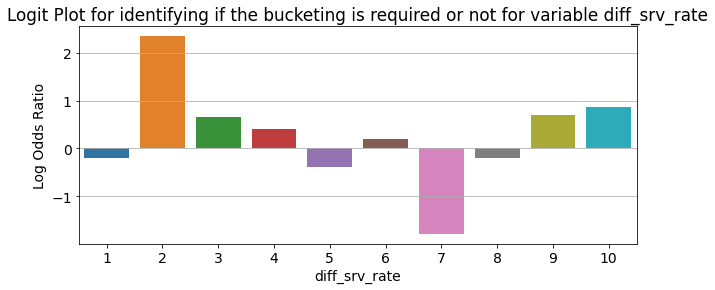

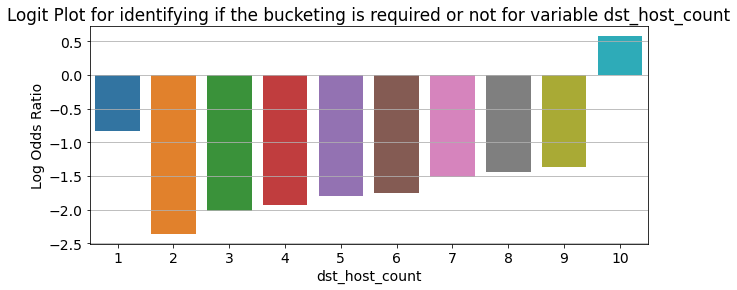

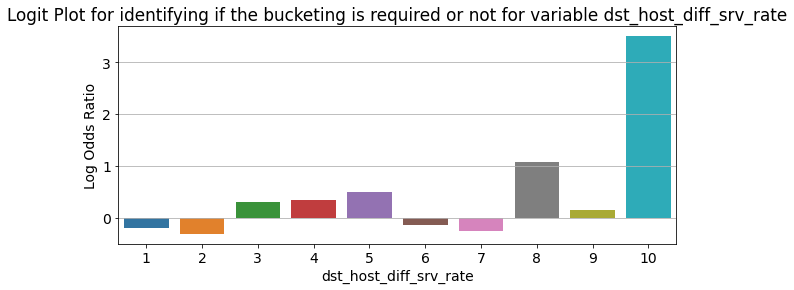

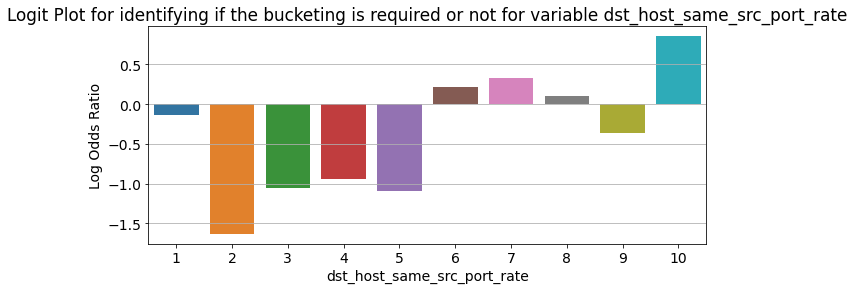

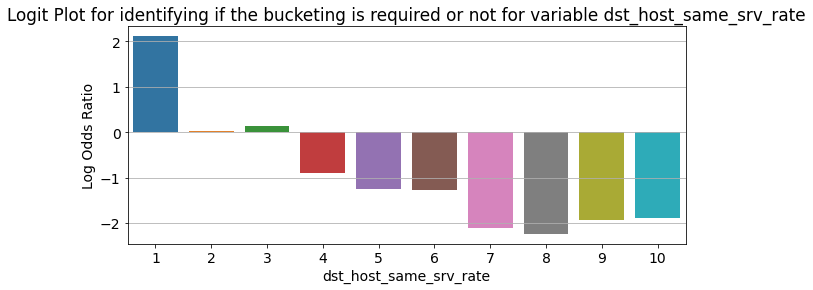

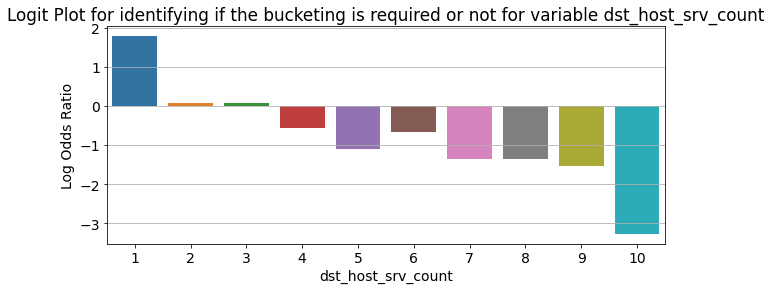

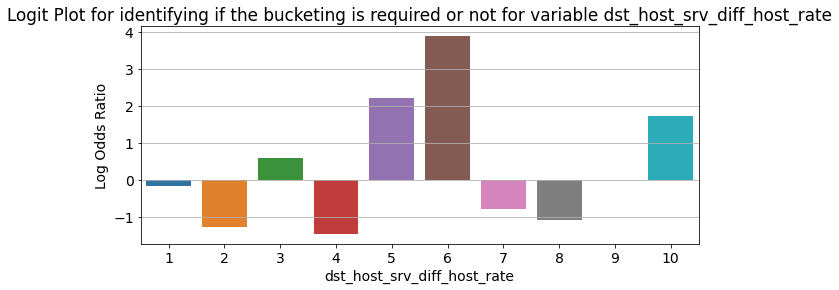

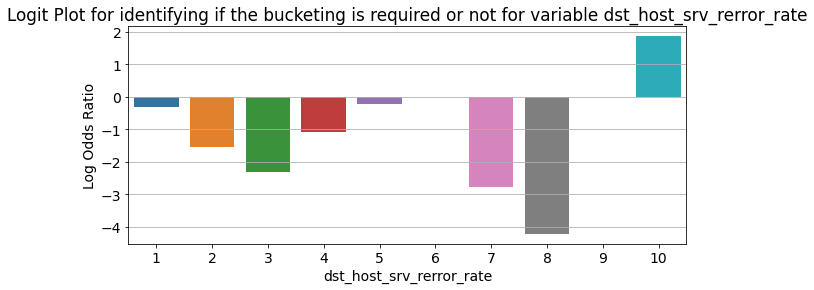

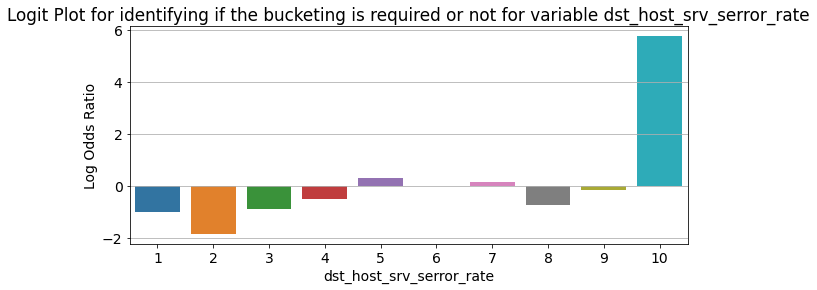

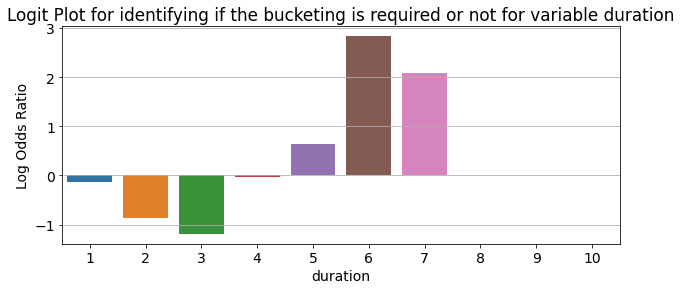

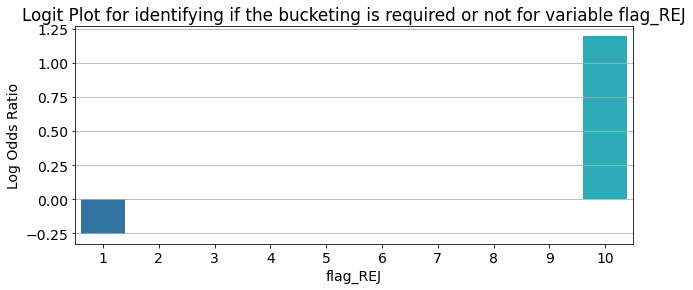

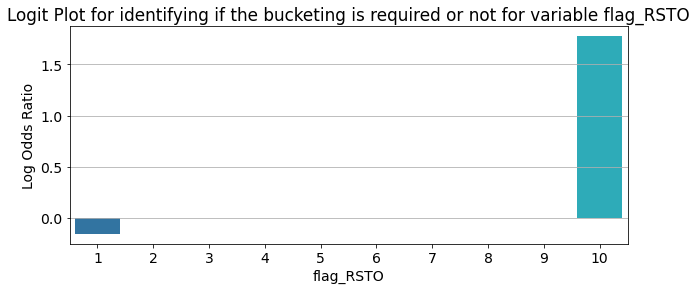

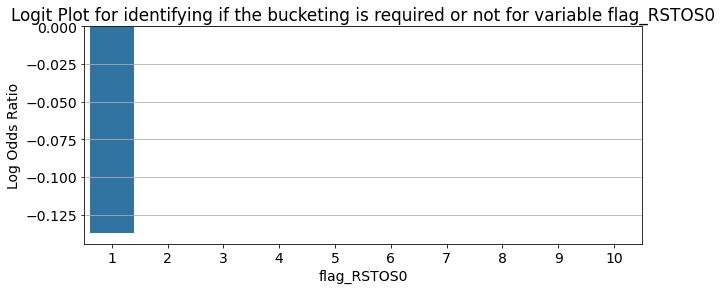

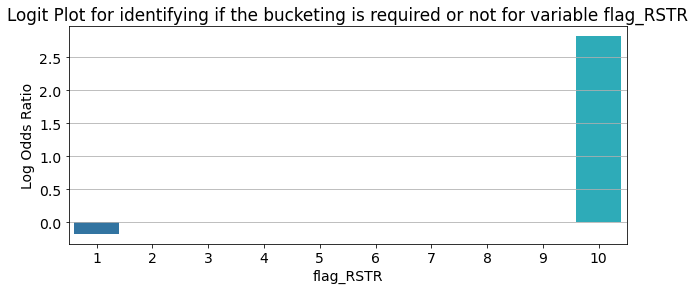

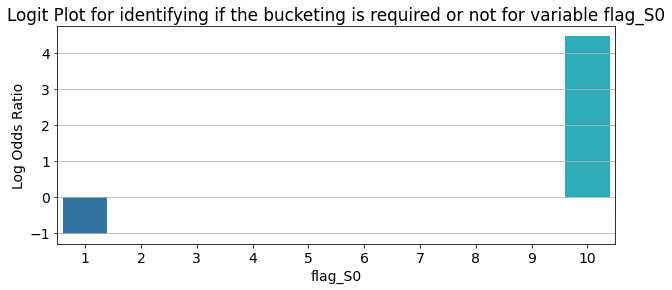

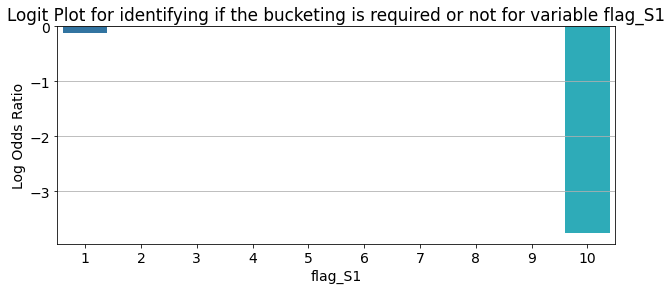

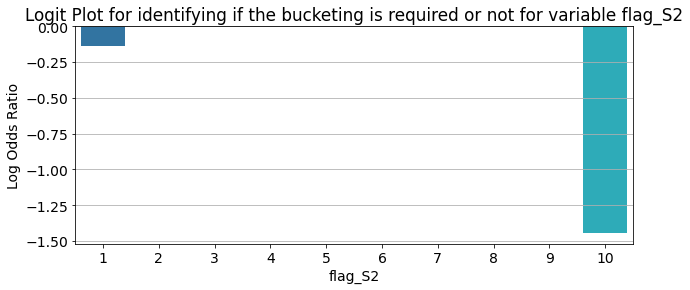

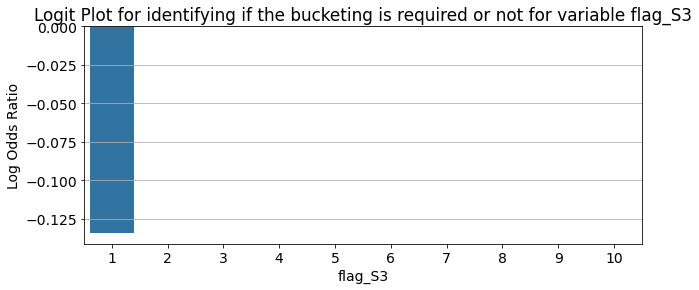

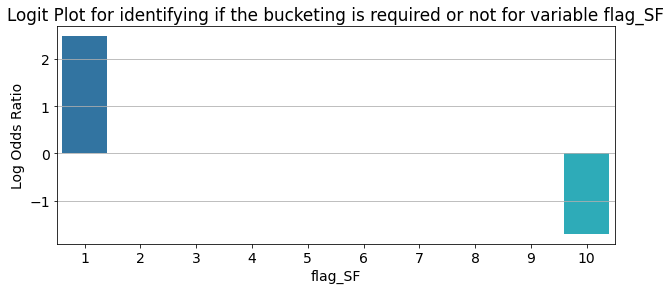

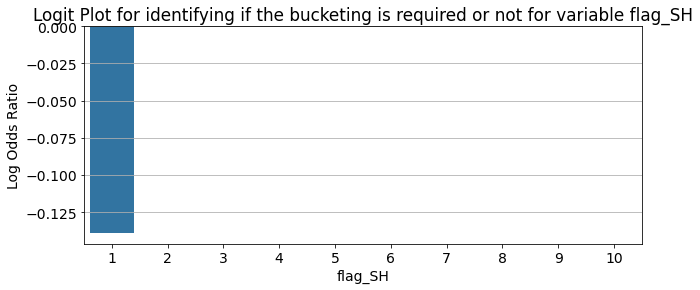

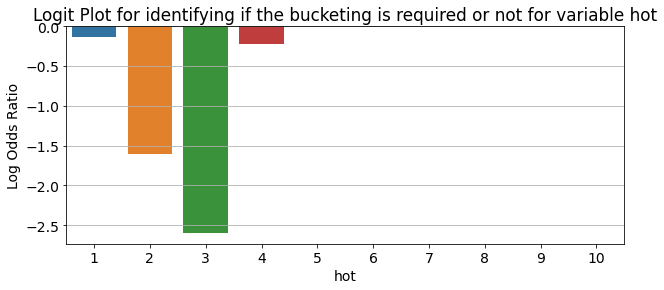

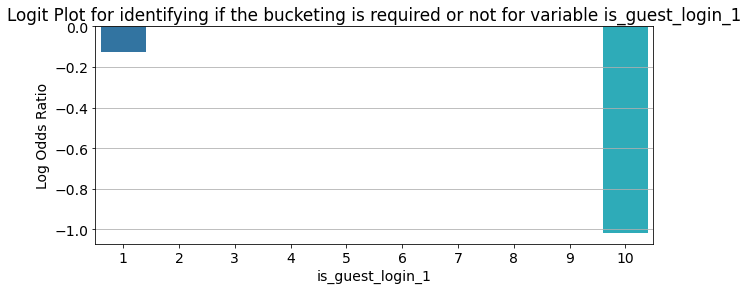

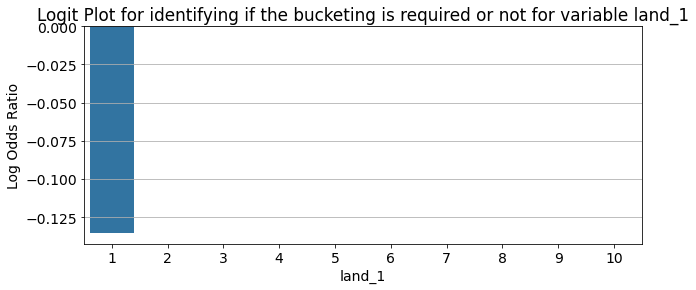

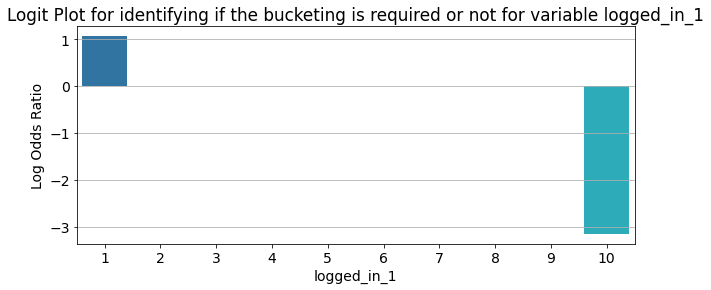

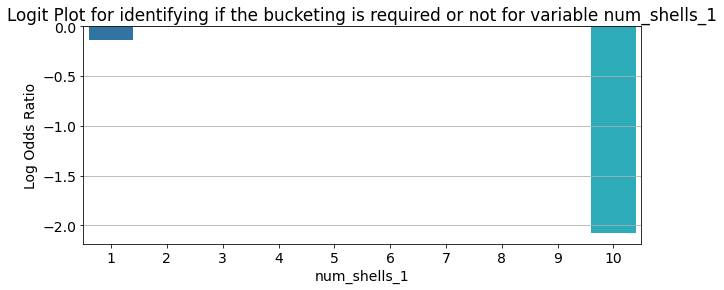

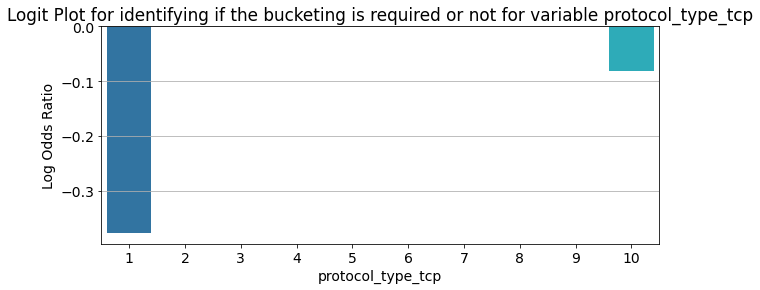

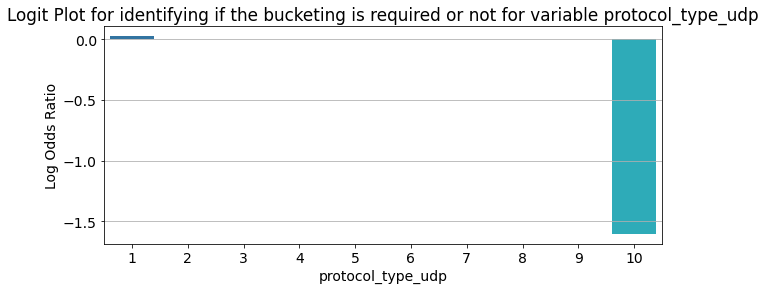

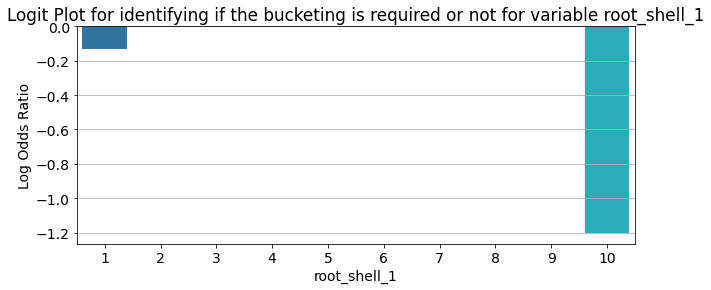

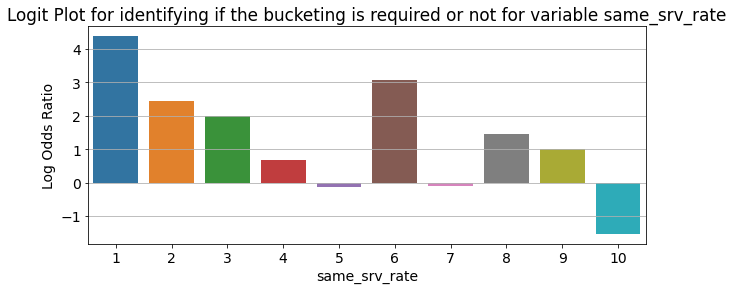

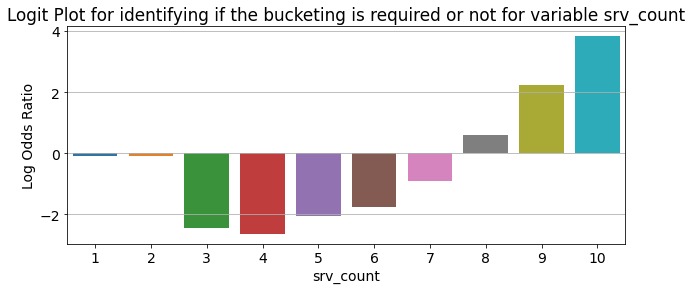

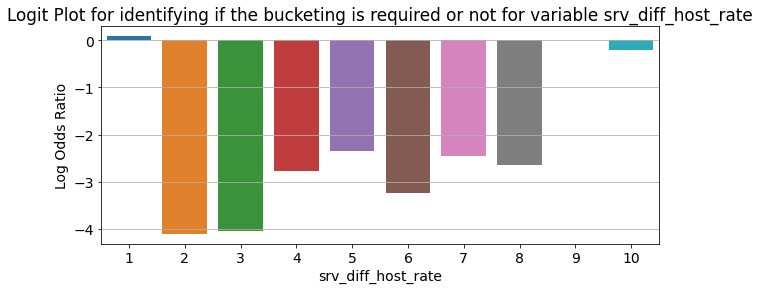

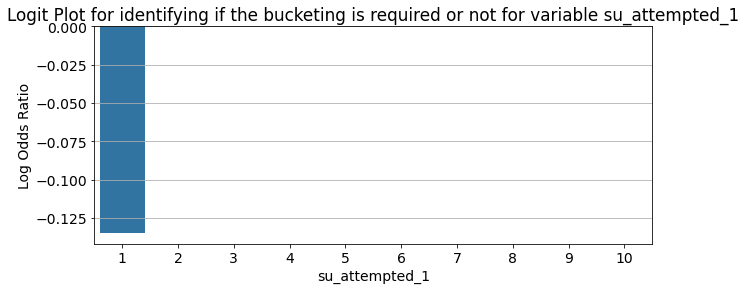

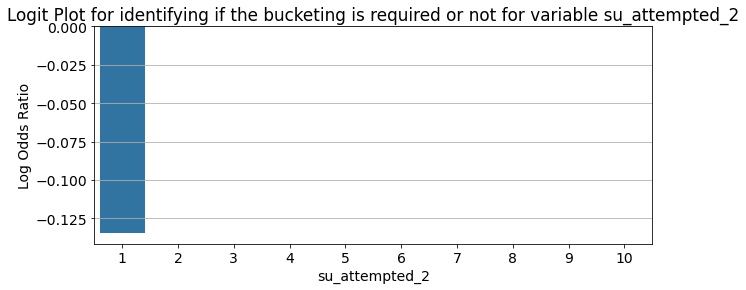

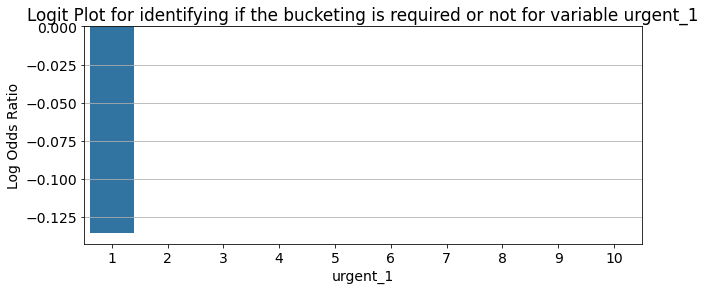

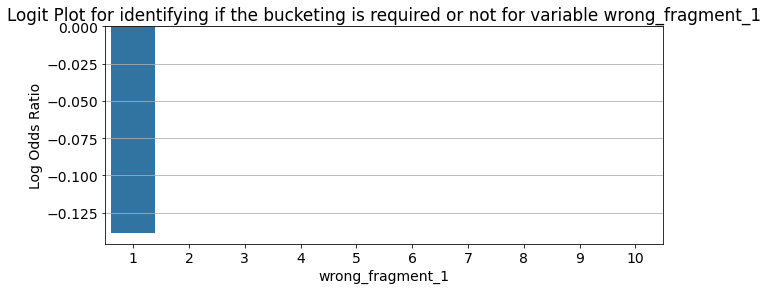

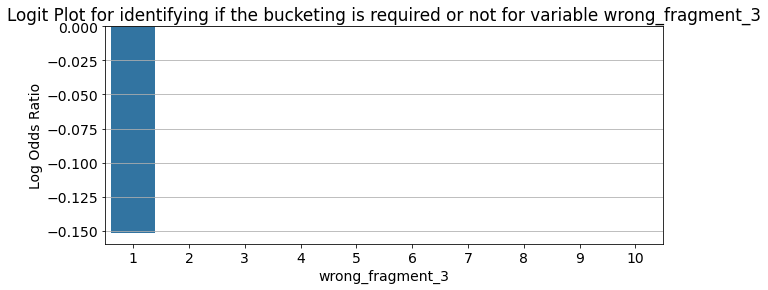

In [50]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_binary.columns.difference(['class']):
    binned = pd.cut(data_binary[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_binary.groupby(binned)['class'].sum() / (data_binary.groupby(binned)['class'].count()-data_binary.groupby(binned)['class'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [53]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Normal': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Anomaly': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Normal'] = dset['Normal'] / dset['Normal'].sum()
    dset['Distr_Attack'] = dset['Anomaly'] / dset['Anomaly'].sum()
    dset['WoE'] = np.log(dset['Distr_Normal'] / dset['Distr_Attack'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Normal'] - dset['Distr_Attack']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [54]:
for col in data_binary.columns:
    if col == 'class': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(data_binary, col, 'class')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: count
IV score: 2.54


WoE and IV for column: diff_srv_rate
IV score: 4.90


WoE and IV for column: dst_host_count
IV score: 1.29


WoE and IV for column: dst_host_diff_srv_rate
IV score: 2.80


WoE and IV for column: dst_host_same_src_port_rate
IV score: 1.20


WoE and IV for column: dst_host_same_srv_rate
IV score: 2.95


WoE and IV for column: dst_host_srv_count
IV score: 3.48


WoE and IV for column: dst_host_srv_diff_host_rate
IV score: 2.26


WoE and IV for column: dst_host_srv_rerror_rate
IV score: 0.52


WoE and IV for column: dst_host_srv_serror_rate
IV score: 4.71


WoE and IV for column: duration
IV score: 0.09


WoE and IV for column: hot
IV score: 0.04


WoE and IV for column: same_srv_rate
IV score: 4.06


WoE and IV for column: srv_count
IV score: 0.38


WoE and IV for column: srv_diff_host_rate
IV score: 0.78


WoE and IV for column: is_guest_login_1
IV score: 0.01


WoE and IV for column: land_1
IV score: 0.00


WoE and IV for column: logged_in_1

In [55]:
data_binary.shape

(25192, 38)

In [56]:
good_iv=["dst_host_srv_rerror_rate",
         "srv_count",
         "duration",
         "protocol_type_udp",
         "last_flag_21",
         "last_flag_19",
         "last_flag_18",
         "last_flag_15",
         "flag_RSTR",
         "flag_REJ",
         "srv_diff_host_rate",
        ]

### You can select the variables based on the information value and below criteria

1. IV: <0.02, Predictive Power: Useless for prediction
2. IV: 0.02 - 0.1, Predictive Power: Weak predictor
3. IV: 0.1 - 0.2, Predictive Power: Medium predictor
4. IV: 0.3 - 0.5, Predictive Power: Storng predictor
5. IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

In [57]:
final_X=list(X.columns.values)

In [58]:
final_X

['dst_host_diff_srv_rate',
 'dst_host_srv_count',
 'wrong_fragment_3',
 'duration',
 'count',
 'dst_host_count',
 'dst_host_srv_serror_rate',
 'diff_srv_rate',
 'hot',
 'flag_RSTO',
 'flag_SF',
 'same_srv_rate',
 'dst_host_srv_rerror_rate',
 'flag_S0',
 'dst_host_srv_diff_host_rate',
 'srv_diff_host_rate',
 'srv_count',
 'logged_in_1',
 'protocol_type_tcp',
 'dst_host_same_src_port_rate',
 'flag_RSTR',
 'protocol_type_udp',
 'dst_host_same_srv_rate',
 'flag_REJ']

In [59]:

final_list=[
    #'last_flag_20',
 #'last_flag_21',
 'diff_srv_rate',
 #'dst_host_srv_count',
 'flag_REJ',
 #'flag_S0',
 'duration',
 #'srv_count',
 'count',
 #'last_flag_19',
 #'dst_host_same_src_port_rate',
 #'dst_host_srv_rerror_rate',
 #'protocol_type_tcp',
 'srv_diff_host_rate',
 #'dst_host_diff_srv_rate',
 #'dst_host_same_srv_rate',
 'logged_in_1',
 #'dst_host_srv_diff_host_rate',
 #'flag_RSTR',
 #'flag_SF',
 #'dst_host_count',
 'hot',
 #'dst_host_srv_serror_rate',
 #'last_flag_18',
 'protocol_type_udp',
 #'last_flag_15',
 'same_srv_rate']

### VIF Variance Inflation Factor

In [60]:
X_new=data_binary[final_list]

In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [62]:
vif.sort_values(by=["VIF Factor"], ascending=False)

,VIF Factor,features
8,5.679566,same_srv_rate
5,4.117092,logged_in_1
7,1.788720,protocol_type_udp
3,1.325293,count
0,1.308427,diff_srv_rate
1,1.305334,flag_REJ
4,1.298380,srv_diff_host_rate
2,1.061434,duration
6,1.023483,hot


### Splitting the data into train & test

In [63]:
X_new=data_binary[final_list]

In [64]:
target = data_binary[['class']]
features = X_new

In [65]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [66]:
#for logistic regression using statsmodels
train, test = train_test_split(data_binary, test_size=0.3, random_state=0)

In [67]:
model_reg = LogisticRegression()
model_reg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred_test=model_reg.predict(test_X)

In [69]:
print(metrics.classification_report( test_y, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4022
           1       0.95      0.87      0.91      3536

    accuracy                           0.92      7558
   macro avg       0.92      0.91      0.92      7558
weighted avg       0.92      0.92      0.92      7558



In [70]:
model_RF=RandomForestClassifier()
model_RF.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred_rf = model_RF.predict(test_X)
print(metrics.classification_report(test_y,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4022
           1       0.95      0.96      0.96      3536

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558



In [84]:
df_test = pd.read_csv('Test_data.csv')
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [85]:
df_test.shape

(22544, 41)

In [86]:
to_obj=["is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment"]

In [87]:
df_test[to_obj]=df_test[to_obj].astype(object)

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  object 
 8   urgent                       22544 non-null  object 
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [89]:
to_delete_1=["num_outbound_cmds",
"dst_host_rerror_rate",
"rerror_rate",     
"srv_rerror_rate",
"dst_host_serror_rate",
"serror_rate",     
"srv_serror_rate", 
"num_compromised",
"service",
"dst_bytes",
"num_access_files",
"num_failed_logins", 
"num_file_creations",
"num_root",
"src_bytes"]

In [90]:
df_test.drop(to_delete_1, inplace=True, axis=1)

In [91]:
df_test.shape

(22544, 26)

In [93]:
to_float=["duration","hot","count","srv_count","dst_host_count","dst_host_srv_count"]
df_test[to_float]=df_test[to_float].astype(float)

In [94]:
cat_var_binary=[
"is_guest_login",
"is_host_login",
"land",
"logged_in",
"flag",
"num_shells",
"root_shell",
"su_attempted",
"urgent",
"wrong_fragment",
"protocol_type"]

In [95]:
data_cat_test_binary=df_test[cat_var_binary]
data_num__test_binary=df_test[df_test.columns.difference(cat_var_binary)]

In [96]:
data_cat_test_binary=pd.get_dummies(data_cat_test_binary, drop_first=True)

In [98]:
df_test_binary=pd.concat([data_num__test_binary,data_cat_test_binary],axis=1)

In [99]:
df_test_binary

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,same_srv_rate,srv_count,srv_diff_host_rate,is_guest_login_1,is_host_login_1,land_1,logged_in_1,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,num_shells_1,num_shells_2,num_shells_5,root_shell_1,su_attempted_1,su_attempted_2,urgent_1,urgent_2,urgent_3,wrong_fragment_1,wrong_fragment_3,protocol_type_tcp,protocol_type_udp
0,229.0,0.06,255.0,0.06,0.00,0.04,10.0,0.00,1.00,0.0,0.0,0.0,0.04,10.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,136.0,0.06,255.0,0.06,0.00,0.00,1.0,0.00,1.00,0.0,0.0,0.0,0.01,1.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.0,0.00,134.0,0.04,0.61,0.61,86.0,0.02,0.00,0.0,2.0,0.0,1.00,1.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,0.00,3.0,0.00,1.00,1.00,57.0,0.28,0.00,0.0,0.0,0.0,1.00,65.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.00,29.0,0.17,0.03,0.31,86.0,0.02,0.71,0.0,1.0,0.0,1.00,8.0,0.75,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.00,100.0,0.06,0.01,0.72,141.0,0.01,0.00,0.0,0.0,0.0,1.00,1.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22540,2.0,0.00,197.0,0.00,0.01,1.00,255.0,0.01,0.00,0.0,0.0,0.0,1.00,11.0,0.18,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22541,5.0,0.00,255.0,0.00,0.00,1.00,255.0,0.00,0.07,0.0,0.0,2.0,1.00,10.0,0.20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22542,4.0,0.00,255.0,0.01,0.00,0.99,252.0,0.00,0.00,0.0,0.0,0.0,1.00,6.0,0.33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [100]:
final_list=[
    #'last_flag_20',
 #'last_flag_21',
 'diff_srv_rate',
 #'dst_host_srv_count',
 'flag_REJ',
 #'flag_S0',
 'duration',
 #'srv_count',
 'count',
 #'last_flag_19',
 #'dst_host_same_src_port_rate',
 #'dst_host_srv_rerror_rate',
 #'protocol_type_tcp',
 'srv_diff_host_rate',
 #'dst_host_diff_srv_rate',
 #'dst_host_same_srv_rate',
 'logged_in_1',
 #'dst_host_srv_diff_host_rate',
 #'flag_RSTR',
 #'flag_SF',
 #'dst_host_count',
 'hot',
 #'dst_host_srv_serror_rate',
 #'last_flag_18',
 'protocol_type_udp',
 #'last_flag_15',
 'same_srv_rate']

In [101]:
X_test = df_test_binary[final_list]

In [102]:
final_prediction = model_RF.predict(X_test)

In [106]:
result = []
for i in final_prediction:
    if i==0:
        result.append('normal')
    else:
        result.append('anomaly')

In [109]:
results = pd.DataFrame(result,columns = ['prediction'])

In [111]:
results.to_csv('prediction.csv')